<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Grid Search로 KNN 알고리즘 모델을 튜닝합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [54]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [56]:
# 상위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [57]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [58]:
# 기초통계량 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

In [59]:
# 가변수화
cols = ['RANK']
data = pd.get_dummies(data, columns=cols, drop_first=True)

**2) x, y 분리**

In [60]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**3) 정규화**

In [61]:
# 정규화
cols = ['GRE', 'TOEFL', 'SOP', 'LOR', 'GPA']
x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())

# 확인
x.head()

,GRE,TOEFL,SOP,LOR,GPA,RESEARCH,RANK_2,RANK_3,RANK_4,RANK_5
0,0.94,0.928571,0.875,0.875,0.913462,1,0,0,1,0
1,0.68,0.535714,0.750,0.875,0.663462,1,0,0,1,0
2,0.52,0.428571,0.500,0.625,0.384615,1,0,1,0,0
3,0.64,0.642857,0.625,0.375,0.599359,1,0,1,0,0
4,0.48,0.392857,0.250,0.500,0.451923,0,1,0,0,0


**4) 학습용, 평가용 데이터 분리**

In [62]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [63]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5) # n_neighbors=5 : 디폴트 값

In [65]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
# 예측하기
y_pred = model.predict(x_test)

In [67]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  8]
 [10 57]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        83
           1       0.88      0.85      0.86        67

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [68]:
# 파라미터 확인
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**성능에 대한 고민**

- 위 모델링 과정에서 n_neighbors=5를 지정했습니다.
- n_neighbors를 다른 값으로 지정하면 성능이 더 좋을 수도 있습니다.
- n_neighbors 외에도 성능에 영향을 주는 파라미터가 더 있을 것입니다.
- 경험이 없는 상태에서 최적의 파라미터를 지정하기는 쉽지 않습니다.

# 5.성능 튜닝

- Grid Search로 튜닝을 진행합니다. 

**1) 모델링 & 튜닝**

- 성능을 확인할 파라미터를 딕셔너리 형태로 선언합니다.

In [69]:
# 파라미터 선언
  # n_neighbors: range(5, 51)
param = {'n_neighbors':range(5, 51)}

# 확인
param

{'n_neighbors': range(5, 51)}

- 사용할 라이브러리를 불러옵니다.

In [70]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

- 다음 두 가지 모델을 선언합니다.
    - 기본 모델: 기본 알고리즘을 사용하는 튜닝 대상 모델
    - 최종 모델: GridSearchCV 알고리즘을 사용하는 모델
- 다음 정보를 최종 모델에 파라미터로 전달합니다.
    - 기본 모델 이름
    - 파라미터 변수
    - cv: K-Fold 분할 대수(기본값=5)
    - scoring: 평가 방법

In [78]:
# 선언하기
model_knn = KNeighborsClassifier()

# Grid Search 모델 선언하기
  # cv=10
  # scoring='accuracy'
model = GridSearchCV(model_knn, # 기본모델
                     param,      # 파라미터 변수
                     cv=10,          # cv값(K-Fold Cross Validation의 분할 수)
                     scoring='accuracy', # 성능 기준
                          n_jobs=-1) # cpu성능 좋아지게 병렬처리

> Grid Search에서는 n_iter= 가 없다

In [79]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(5, 51)}, scoring='accuracy')

**2) 결과 확인**

- model.cv_results_ 속성에 성능 테스트와 관련된 많은 정보가 포함되어 있습니다.

In [80]:
# 관련 정보들
model.cv_results_

{'mean_fit_time': array([0.01119077, 0.00731652, 0.00663116, 0.00721459, 0.00755775,
        0.00918839, 0.00672653, 0.0069911 , 0.00778675, 0.0086278 ,
        0.007757  , 0.00708961, 0.00662506, 0.00877602, 0.00790064,
        0.00695088, 0.00756249, 0.00829937, 0.00684094, 0.0068182 ,
        0.00713317, 0.00728633, 0.00769031, 0.00807688, 0.00689065,
        0.00761683, 0.00711856, 0.0073467 , 0.00630953, 0.00652628,
        0.0071305 , 0.00694387, 0.00617242, 0.00838621, 0.01262045,
        0.0066607 , 0.00774553, 0.00704215, 0.00603659, 0.00676112,
        0.00707688, 0.00622289, 0.00647581, 0.00593019, 0.00570226,
        0.00604236]),
 'std_fit_time': array([0.00809504, 0.00118424, 0.00066568, 0.00331852, 0.00200406,
        0.00565563, 0.00148856, 0.00067571, 0.00153783, 0.00335854,
        0.0029701 , 0.00111157, 0.0008265 , 0.00521105, 0.00116189,
        0.00116486, 0.00103248, 0.002303  , 0.00135435, 0.00045255,
        0.00165511, 0.00320429, 0.00402239, 0.00207751, 0.001

- 이 중 중요한 정보를만 추출해서 확인합니다.
- 다음 3가지는 꼭 기억해야 합니다.
    - model.cv_results_['mean_test_score']: 테스트로 얻은 성능
    - model.best_params_: 최적의 파라미터
    - model.best_score_: 최고의 성능

In [81]:
# 중요 정보 확인
print('=' * 70)
print(model.cv_results_['param_n_neighbors'].data)
print('-' * 70)
print(model.cv_results_['mean_test_score'])
print('-' * 70)
print('최적파라미터:', model.best_params_)
print('-' * 70)
print('최고성능:', model.best_score_)
print('=' * 70)

[5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
----------------------------------------------------------------------
[0.83428571 0.84       0.83714286 0.83142857 0.83428571 0.83714286
 0.83142857 0.84285714 0.84       0.82857143 0.82       0.82857143
 0.82857143 0.83142857 0.83428571 0.83428571 0.83714286 0.84285714
 0.83714286 0.84285714 0.83428571 0.84285714 0.82857143 0.83428571
 0.83428571 0.83428571 0.84       0.84571429 0.83714286 0.84
 0.83714286 0.84       0.83142857 0.84       0.83428571 0.83428571
 0.82857143 0.83142857 0.82857143 0.82571429 0.81714286 0.82285714
 0.81428571 0.81714286 0.82285714 0.80857143]
----------------------------------------------------------------------
최적파라미터: {'n_neighbors': 32}
----------------------------------------------------------------------
최고성능: 0.8457142857142855


- 성능 정보를 시각화해 파라미터에 따른 성능 변화를 확인합니다.

{'n_neighbors': 32}


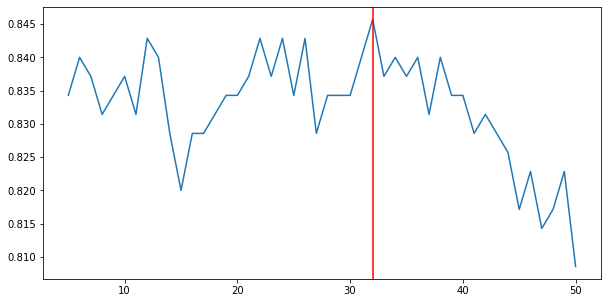

In [82]:
# 데이터프레임으로 변환
tmp = pd.DataFrame()
tmp['neighbor'] = model.cv_results_['param_n_neighbors'].data
tmp['score'] = model.cv_results_['mean_test_score']
print(model.best_params_)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(tmp['neighbor'], tmp['score'])
plt.axvline(model.best_params_['n_neighbors'], color='r')
plt.show()

**3) 예측과 평가**

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수 없는 없겠지요?

In [83]:
# 예측하기
y_pred = model.predict(x_test)

In [84]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76  7]
 [11 56]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        83
           1       0.89      0.84      0.86        67

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

